Implementação em Python dos algoritmos de **Busca em Largura** e **Busca em Profundidade** para resolver o problema do jogo do 8, conforme modelo abaixo.

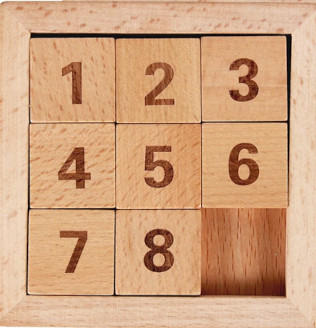

Definição da classe **Estado** que representa os diferentes estados da busca (os nodos da árvore de busca). Neste exemplo cada estado é descrito por uma matriz 3x3 que armazena em cada posição o número que a ocupa, ou um ' ' para representar a casa que está livre. O atributo pai serve para indentificar o estado que levou até o estado atual. Após encontrar a resposta, é por meio deste atributo que se define a sequência de movimentos que deve ser feita, partindo do estado final, e buscando o seu pai de forma iterativa até chegar ao estado de origem (raiz da árvore). Embora o algoritmo de busca não processe uma árvore efetivamente, por meio do atributo pai é possível montar a árvore partindo de todos os nodos constantes na fronteira, até atingir a raiz da árvore.



In [1]:
class Estado:
  def __init__(self, posicoes, pai):
    self.posicoes = posicoes
    self.pai = pai

Definição da classe Busca. Esta é a classe base utilizada para derivar as classes específicas de BuscaLargura e BuscaProfundidade. Ela possui todos os métodos que realizam as buscas efetivamente. Neste exemplo não está sendo feito o controle de estados repetidos para simplificar o código.

In [2]:
from copy import deepcopy

class Busca:


# Implementação do método que realiza a busca efetivamente. Este método recebe como parâmetros o estado inicial e o estado final da busca,
# ambos representados por uma matriz 3x3, e a estrura de dados que armazena a fronteira (os nós ainda não expandidos)
  def busca(self, inicial, final, fronteira):
    atual = Estado(inicial, None)
    fronteira.put(atual)
    qtdVisitados = 1
    qtdExpandidos = 0
    resultado = None
    while not fronteira.empty() and resultado == None:
      atual = fronteira.get()
      qtdExpandidos += 1
      resultado, fronteira, qtdVisitados = self.geraFilhos(atual, final, fronteira, qtdVisitados)
    return resultado, qtdVisitados, qtdExpandidos

#Implementação do método geraFilhos. Este método recebe um nodo da árvore como parâmetro e gera os filhos a partir das regras do jogo.
#Observe que diferentemente do exemplo anterior, não existe um grafo com uma lista de vértices e suas adjacências, o grafo vai sendo gerado
#durante a busca, realizando os movimentos possíveis em cada estado.

  def geraFilhos(self, atual,  final, fronteira, qtdVisitados):
    i, j = self.localizaBranco(atual)
#Verifica a posição do espaço em branco para definir quais movimentos são possíveis a partir do estado atual.
#Dependendo da posição de 2 a 4 movimentos são possíveis.

    if (j>0):
      filho = self.moveBrancoEsquerda(atual, i, j)
      qtdVisitados += 1
      if (filho.posicoes == final):
         return filho, fronteira, qtdVisitados
      else:
          fronteira.put(filho)

    if (j<2):
      filho = self.moveBrancoDireita(atual, i, j)
      qtdVisitados += 1
      if (filho.posicoes == final):
         return filho, fronteira, qtdVisitados
      else:
         fronteira.put(filho)

    if (i>0):
      filho = self.moveBrancoCima(atual, i, j)
      qtdVisitados += 1
      if (filho.posicoes == final):
         return filho, fronteira, qtdVisitados
      else:
          fronteira.put(filho)

    if (i<2):
      filho = self.moveBrancoBaixo(atual, i, j)
      qtdVisitados += 1
      if (filho.posicoes == final):
         return filho, fronteira, qtdVisitados
      else:
         fronteira.put(filho)

    return None, fronteira, qtdVisitados


  def localizaBranco(self, atual):
    i = 0
    for l in atual.posicoes:
      j = 0
      for e in l:
        if e == ' ':
          return i, j
        j = j + 1
      i = i + 1

  def moveBrancoDireita(self, atual, i , j):
    temp = deepcopy(atual.posicoes)
    temp[i][j] = temp[i][j+1]
    temp[i][j+1] = ' '
    novo = Estado(temp, atual)
    return novo

  def moveBrancoEsquerda(self, atual, i , j):
    temp = deepcopy(atual.posicoes)
    temp[i][j] = temp[i][j-1]
    temp[i][j-1] = ' '
    novo = Estado(temp, atual)
    return novo

  def moveBrancoCima(self, atual, i , j):
    temp = deepcopy(atual.posicoes)
    temp[i][j] = temp[i-1][j]
    temp[i-1][j] = ' '
    novo = Estado(temp, atual)
    return novo

  def moveBrancoBaixo(self, atual, i , j):
    temp = deepcopy(atual.posicoes)
    temp[i][j] = temp[i+1][j]
    temp[i+1][j] = ' '
    novo = Estado(temp, atual)
    return novo

#Implementação do método que apresenta os resultados da busca. O resultado está na
#ordem inversa pois ele é descoberto retornando do estado final até o estado inicial,
#consultando o atributo pai da classe Estado. Para apresentá-lo na ordem correta,
#basta inserir os estados em uma lista em vez de mostrá-los diretamente e
#depois mostrar a lista na ordem inversa.
  def mostraResultado(self, resultado, qtdVisitados, qtdExpandidos):
    if (resultado==None):
      print('Solução não encontrada.')
    else:
      print('***Rota encontrada***')
      while (resultado != None):
        print(resultado.posicoes)
        resultado = resultado.pai
    print('Estados visitados: ',qtdVisitados)
    print('Estados expandidos: ',qtdExpandidos)


Aqui termina a classe **Busca** e são definidas as classes derivadas que implementam cada um dos diferentes algoritmos de busca.

Definição da classe **BuscaLargura**. Os métodos de busca e geração dos filhos são os mesmos da classe base. O fato de implementar a fronteira como uma **Fila** é o que caracteriza a **Busca em Largura**.

In [3]:
# Importação da classe Queue que implementa a Fila usada para armazenar a fronteira
from queue import Queue

class BuscaLargura(Busca):

  def realizaBusca(self, origem, destino):
    fronteira = Queue()
    resultado, qtdVisitados, qtdExpandidos = self.busca(origem, destino, fronteira)
    self.mostraResultado(resultado, qtdVisitados, qtdExpandidos)

Para executar a busca em largura basta instanciar um objeto da classe **BuscaLargura**, definir as cidades de origem e destino e fazer a chamada do método conforme exemplo abaixo.

In [4]:
algbusca = BuscaLargura()
algbusca.realizaBusca([['1','2','3'],['4',' ','6'],['7','5','8']],[['1','2','3'],['4','5','6'],['7','8',' ']])

***Rota encontrada***
[['1', '2', '3'], ['4', '5', '6'], ['7', '8', ' ']]
[['1', '2', '3'], ['4', '5', '6'], ['7', ' ', '8']]
[['1', '2', '3'], ['4', ' ', '6'], ['7', '5', '8']]
Estados visitados:  16
Estados expandidos:  5


Definição da classe **BuscaProfundidade**. Os métodos de busca e geração dos filhos são os mesmos da classe base. O fato de implementar a fronteira como uma **Pilha** é o que caracteriza a **Busca em Profundidade**.

In [5]:
# Importação da classe LifoQueue que implementa a Pilha usada para armazenar a fronteira
from queue import LifoQueue

class BuscaProfundidade(Busca):

  def realizaBusca(self, origem, destino):
    fronteira = LifoQueue()
    resultado, qtdVisitados, qtdExpandidos = self.busca(origem, destino, fronteira)
    self.mostraResultado(resultado, qtdVisitados, qtdExpandidos)

Para executar a busca em profundidade basta instanciar um objeto da classe **BuscaProfundidade**, definir as cidades de origem e destino e fazer a chamada do método conforme exemplo abaixo.

In [6]:
algbusca = BuscaProfundidade()
algbusca.realizaBusca([['1','2','3'],['4',' ','6'],['7','5','8']],[['1','2','3'],['4','5','6'],['7','8',' ']])

***Rota encontrada***
[['1', '2', '3'], ['4', '5', '6'], ['7', '8', ' ']]
[['1', '2', '3'], ['4', '5', '6'], ['7', ' ', '8']]
[['1', '2', '3'], ['4', ' ', '6'], ['7', '5', '8']]
Estados visitados:  7
Estados expandidos:  2
